###1.ndarray 성능확인


In [ ]:
import numpy as np

In [ ]:
A = [1, 2, 3]
B = [4, 5, 6]
C = []
for a, b in zip(A, B):
  C.append(a + b)

print(C)

[5, 7, 9]


In [ ]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
C = A + B
print(C)

[5 7 9]


In [ ]:
a = [[ 1, 2, 3, 4 ] for _ in range(1000000)]  # a 1000000 행, 4 열 - list
b = np.array(a) # ndarray

def exchange_list(a):
  c = []
  for x in a:
      x[2], x[3], x[0], x[1] = x
      c.append(x)
  return c

def exchange_ndarray(a):
   return a[ : ,[2, 3, 0, 1]]

In [ ]:
print(a[:2], b[:2], sep='\n')

[[1, 2, 3, 4], [1, 2, 3, 4]]
[[1 2 3 4]
 [1 2 3 4]]


In [ ]:
c = exchange_list(a)
d = exchange_ndarray(b)
print(c[:2], d[:2], sep='\n')  

[[3, 4, 1, 2], [3, 4, 1, 2]]
[[3 4 1 2]
 [3 4 1 2]]


In [ ]:
%timeit exchange_list(a)

10 loops, best of 3: 160 ms per loop


In [ ]:
%timeit exchange_ndarray(b) 

100 loops, best of 3: 10.9 ms per loop


###2.ndarray 속성

In [ ]:
import numpy as np

In [ ]:
#print array information
def printInfo(a):
    data = ['a.ndim', 'a.shape', 'a.size', 'a.dtype', 'a.itemsize', 'a.strides']
    for x in data:
        print('%-11s' % x, eval(x))

a = np.array([[0,1,2],[3,4,5]])#, dtype=np.int32)
printInfo(a)
#print(a.ndim, a.shape, a.size, a.dtype, a.itemsize, a.strides)

a.ndim      2
a.shape     (2, 3)
a.size      6
a.dtype     int64
a.itemsize  8
a.strides   (24, 8)
2 (2, 3) 6 int64 8 (24, 8)


###3.ndarray 생성

In [ ]:
import numpy as np

In [ ]:
def printary(*a):
    for x in a:
        print(f'{type(x)}\n{x.dtype}\n{x}', end='\n\n')
            
    print("-" * 30)

#####1) np.array 사용

In [ ]:
#np.array(object : array_like, dtype=None)
a = np.array([1, 2, 3])
b = np.array([[1, 2, 3], [4, 5, 6]])
c = np.array([[1, 2, 3], [4, 5]])  # array_like가 아님
printary(a, b, c)

In [ ]:
# Structured Array
sdtype = [('name', '<U10'), ('height', '<i4'), ('weight', np.float32)]
value =  [('Tom', 178, 98.5), ('Jim', 183, 79.5), ('Adam',  175, 82.8)]
    
a = np.array(value, dtype=sdtype)

printary(a)
a

<class 'numpy.ndarray'>
[('name', '<U10'), ('height', '<i4'), ('weight', '<f4')]
[('Tom', 178, 98.5) ('Jim', 183, 79.5) ('Adam', 175, 82.8)]

------------------------------


array([('Tom', 178, 98.5), ('Jim', 183, 79.5), ('Adam', 175, 82.8)],
      dtype=[('name', '<U10'), ('height', '<i4'), ('weight', '<f4')])

In [ ]:
printary(a['name'], a['height'], a['weight'])
printary(a[0], a[1], a[2])
print(a.shape, a.strides, a[0])   # a.strides - 1개 row에 해당하는 메모리 크기

#####2) np.arange 사용

In [ ]:
# np.arange(stop:number, dtype=None), np.arnage(start, stop), np.arange(start, stop, step)
a = np.arange(5)
b = np.arange(1, 10, 2)
c = np.arange(1, 2, 0.1)
printary(a, b, c)

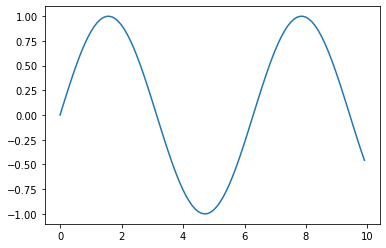

In [ ]:
#그래프 그릴때 축설정으로 사용 예
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y = np.sin(x)
plt.plot(x, y)
plt.show()

In [ ]:
# 1개 값도 array_like 이다
x = np.array(1)
print(x, type(x))

1 <class 'numpy.ndarray'>


#####3) np.linspace 사용

In [ ]:
# np.linspace(start:array_like, stop, num=50, endpoint=True, retstep=False, dtype=None)
a = np.linspace(1, 5, 9)
b = np.linspace(1, 5, 10, endpoint=False)
c = np.linspace(1, 5, 9, retstep=True)
print(a, b, c, sep="\n")

[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[1.  1.4 1.8 2.2 2.6 3.  3.4 3.8 4.2 4.6]
(array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]), 0.5)


In [ ]:
x = np.linspace([1, 2, 3], [2, 4, 6], num=5)
print(x)

[[1.   2.   3.  ]
 [1.25 2.5  3.75]
 [1.5  3.   4.5 ]
 [1.75 3.5  5.25]
 [2.   4.   6.  ]]


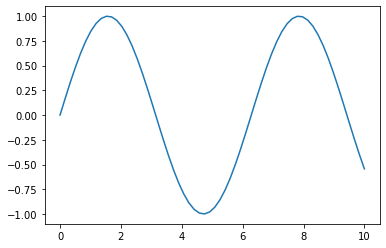

In [ ]:
x = np.linspace(0, 10, 60)
y = np.sin(x)
plt.plot(x, y)
plt.show()

#####4) random 사용

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.set_printoptions(threshold=999,
                    suppress=True,
                    precision=4,
                    edgeitems=3)

In [ ]:
def printary(*a):
    for x in a :
        print(f"shape : {x.shape}")
        print(f"array : %s{x} " % ('' if x.ndim == 1 else '\n'))
        print("mean  : %.3f, std : %.3f" % (x.mean(), x.std()))
        print("-" * 30)

In [ ]:
def showHist(x):
  plt.hist(x)
  plt.show()

In [ ]:
# np.random.rand(d0, d1, ...,dn)  
# 0~1 사이의 균일 분포로 실수 난수 배열 생성
# d0, d1, ..., dn : 배열의 shape을 의미하는 정수
a = np.random.rand(5)
b = np.random.rand(2, 2, 3)
printary(a, b)

shape : (5,)
array : [0.5837 0.0352 0.9714 0.6114 0.6029] 
mean  : 0.561, std : 0.300
------------------------------
shape : (2, 2, 3)
array : 
[[[0.8465 0.0498 0.3968]
  [0.065  0.3175 0.8343]]

 [[0.213  0.4221 0.1589]
  [0.9529 0.8446 0.6274]]] 
mean  : 0.477, std : 0.317
------------------------------


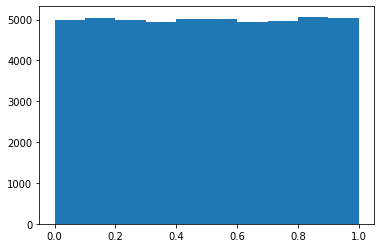

In [ ]:
showHist(np.random.rand(50000))

In [ ]:
# np.random.randint(e, size=n)
# np.random.randint(s, e, size=n)
# 0~e-1, s~e-1 범위의 값을 갖는 균일 분포의 정수 난수 생성
# size : 정수(1차원), tuple(1차원 이상)로 shape 지정
a = np.random.randint(10, size=(5,))
b = np.random.randint(50, 100, (2,4)) 
printary(a, b)

shape : (5,)
array : [3 7 7 3 3] 
mean  : 4.600, std : 1.960
------------------------------
shape : (2, 4)
array : 
[[70 55 60 59]
 [72 62 59 58]] 
mean  : 61.875, std : 5.600
------------------------------


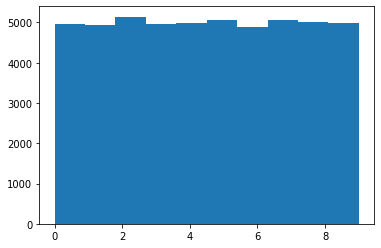

In [ ]:
showHist(np.random.randint(10, size=50000))

In [ ]:
# np.random.randn(d0, d1, ... dn)
# 평균 0, 표준편차 1을 갖는 가우시안 표준 정규 분포로 난수 배열 생성(음수 포함)
a = np.random.randn(5)
b = np.random.randn(200, 50)
printary(a, b)

shape : (5,)
array : [ 0.0887  0.4696  0.2496  0.0511 -0.6025] 
mean  : 0.051, std : 0.359
------------------------------
shape : (200, 50)
array : 
[[-0.3758  0.1685 -1.5191 ...  1.2369  0.0547  0.3518]
 [ 0.0313 -0.5622 -0.4562 ...  0.5118  0.7811  0.512 ]
 [ 0.2184 -1.4841  0.1861 ... -1.3295 -0.2064 -0.3841]
 ...
 [ 1.5983  1.4777  1.1309 ... -0.9259  0.4862  0.7126]
 [-0.4622 -0.9972 -1.828  ...  1.212   1.6168  0.3936]
 [-0.0172  0.9921 -1.3381 ...  0.4823  0.2638 -0.3589]] 
mean  : -0.009, std : 1.004
------------------------------


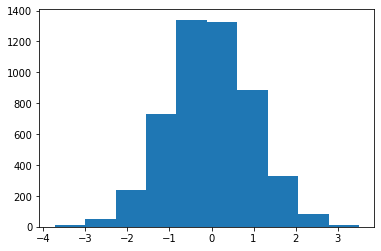

In [ ]:
showHist(np.random.randn(5000))

In [ ]:
# np.random.normal(평균, 표준편차, size)
# 생략하면 평균=0, 표준편차=1, size=1이 됨
a = np.random.normal(2, 3, (100, 20))
printary(a)

shape : (100, 20)
array : 
[[ 5.6237  5.8926  1.5195 ...  3.8577  6.3786  0.7015]
 [ 5.3553  1.9728 -0.3652 ...  4.1307  2.6446 -1.8077]
 [ 4.388   1.9153  0.4403 ... -1.2561  4.2421 -0.77  ]
 ...
 [ 6.0529  0.1067  2.503  ...  7.7467  6.0368  5.2816]
 [ 6.7905  1.5606  6.1745 ...  2.5529  2.418  -2.1501]
 [ 7.2365  5.1494 -0.1361 ...  2.3857 -3.141   6.8682]] 
mean  : 1.978, std : 2.997
------------------------------


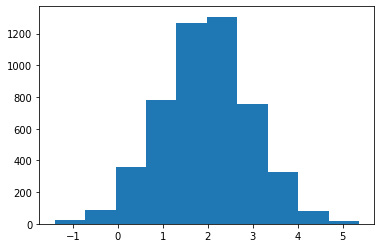

In [ ]:
showHist(np.random.normal(2, 1, (5000,)))

In [ ]:
#np.random.permutation(e) : 0 ~ e-1 값을 갖는 정수의 무작위 순서 1차원 배열 생성
#np.random.permutation(c) : c 요소들에 대해 무작위 순서로 변경된 1차원 배열 생성
# e : 정수, c : array_like 객체
a = np.random.permutation(10)
data = np.array([1,3,4,5,3,1,3])
b = np.random.permutation(data)
mylist = [[1,2,3],[4,5,6],[7,8,9],[3,2,1]]
c = np.random.permutation(mylist)
printary(a, b, c)

shape : (10,)
array : [6 0 4 2 1 3 8 7 9 5] 
mean  : 4.500, std : 2.872
------------------------------
shape : (7,)
array : [1 3 4 3 3 1 5] 
mean  : 2.857, std : 1.355
------------------------------
shape : (4, 3)
array : 
[[7 8 9]
 [1 2 3]
 [3 2 1]
 [4 5 6]] 
mean  : 4.250, std : 2.618
------------------------------


#####5) 특정값으로 채워진 ndarray생성

In [ ]:
import numpy as np

In [ ]:
def printary(*a):
    for x in a:
        print(f'{x.dtype}\n{x}')
    print("-" * 30)

In [ ]:
mshape = (2, 3)  

In [ ]:
#np.zeros(shape, dtype=float64)
#shape: 정수(1차원), tuple(1차원 이상)
a = np.zeros(10, dtype = np.int32)
b = np.zeros(mshape)
printary(a, b)

int32
[0 0 0 0 0 0 0 0 0 0]
float64
[[0. 0. 0.]
 [0. 0. 0.]]
------------------------------


In [ ]:
#np.empty(shape, dtype=float64)
a = np.empty(10, dtype=np.int32)
b = np.empty(mshape)
printary(a, b)

int32
[0 0 0 0 0 0 0 0 0 0]
float64
[[0. 0. 0.]
 [0. 0. 0.]]
------------------------------


In [ ]:
#np.ones(shape,dtype=float64)
#np.full(shape, value, dtype=None)
a = np.ones(mshape)
b = np.full(mshape, 5)
printary(a, b)

float64
[[1. 1. 1.]
 [1. 1. 1.]]
int64
[[5 5 5]
 [5 5 5]]
------------------------------


In [ ]:
#np.eye(N, M=None, k=0, dtype=float64)
a = np.eye(3)
b = np.eye(3, 5, 2)
c = np.eye(3, 5, -1)
printary(a, b, c)

float64
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
float64
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
float64
[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
------------------------------


In [ ]:
#np.zeros_like(array_like, dtype=None)
a = np.zeros_like([1,2,3])
b = np.empty_like([1,2,3])
printary(a, b)

int64
[0 0 0]
int64
[    63714208 481036337152 433791696997]
------------------------------


In [ ]:
a = np.ones_like([[1,2,3],[4,5,6]], dtype=np.float32)
b = np.full_like(np.arange(5), 5)
printary(a, b)

float32
[[1. 1. 1.]
 [1. 1. 1.]]
int64
[5 5 5 5 5]
------------------------------


###4.view or copy

In [ ]:
def npinfo(n, a, x):
    print("name    :", n)    
    print("share   :", np.may_share_memory(a, x) )
    print("data    :", x.tolist())    
    print("ndim    :", x.ndim)
    print("shape   :", x.shape)
    print("dtype   :", x.dtype)
    print("-" * 30)

In [ ]:
# copy
a = np.array([[True, True], [False, False]], dtype=np.bool)
b = a.copy()
b[0, 0] = False  # 0 also can use
npinfo("original", a, a)
npinfo("copy", a, b)

name    : original
share   : True
data    : [[True, True], [False, False]]
ndim    : 2
shape   : (2, 2)
dtype   : bool
------------------------------
name    : copy
share   : False
data    : [[False, True], [False, False]]
ndim    : 2
shape   : (2, 2)
dtype   : bool
------------------------------


In [ ]:
# view
a = np.array([[True, True], [False, False]], dtype=np.bool)
b = a.view(np.bool)
b[0, 0] = 0
npinfo("original", a, a)
npinfo("view", a, b)  

name    : original
share   : True
data    : [[False, True], [False, False]]
ndim    : 2
shape   : (2, 2)
dtype   : bool
------------------------------
name    : view
share   : True
data    : [[False, True], [False, False]]
ndim    : 2
shape   : (2, 2)
dtype   : bool
------------------------------


###5.ndarray 변환 (reshape, flatten)

In [ ]:
import sys
def npinfo(n, a, x):
    print("name   :", n)
    print("share  :", np.may_share_memory(a, x))
    print("data   :", x.tolist())  
    print("shape  :", x.shape)
    print("dtype  :", x.dtype)
    print("stride :", x.strides)
    print("addr   :", x.__array_interface__['data'][0])    
    print("sizeof :", sys.getsizeof(x))
    print("-" * 30)

In [ ]:
#np.reshape(a, newshape: int or tuple or ints, order='C')
#arr.reshape(newshape: int or tuple or ints, order='C')
a = np.array([[1,2,3],[4,5,6]])
b = a.reshape(1, -1)
npinfo("a.reshape(1, -1)", a, b)

name   : a.reshape(1, -1)
share  : True
data   : [[1, 2, 3, 4, 5, 6]]
shape  : (1, 6)
dtype  : int64
stride : (48, 8)
addr   : 59067392
sizeof : 112
------------------------------


In [ ]:
b = a.reshape(-1)
npinfo("a.reshape(-1)", a, b)
#a.tolist(), b.tolist()

name   : a.reshape(-1)
share  : True
data   : [100, 2, 3, 4, 5, 6]
shape  : (6,)
dtype  : int64
stride : (8,)
addr   : 59067392
sizeof : 96
------------------------------


([[100, 2, 3], [4, 5, 6]], [100, 2, 3, 4, 5, 6])

In [ ]:
b = a.reshape(-1, 1)
npinfo("a.reshape(-1, 1)", a, b)

name   : a.reshape(-1, 1)
share  : True
data   : [[100], [2], [3], [4], [5], [6]]
shape  : (6, 1)
dtype  : int64
stride : (8, 8)
addr   : 59067392
sizeof : 112
------------------------------


In [ ]:
b = a.reshape(-1, 1, order='F')
npinfo("a.reshape(-1, 1, order='F')", a, b)

name   : a.reshape(-1, 1, order='F')
share  : False
data   : [[100], [4], [2], [5], [3], [6]]
shape  : (6, 1)
dtype  : int64
stride : (8, 48)
addr   : 59146064
sizeof : 112
------------------------------


In [ ]:
a = np.array([[1,2,3], [4, 5, 6]], dtype=np.int32)
print(a)

[[1 2 3]
 [4 5 6]]


In [ ]:
b = a.flatten()
b[0] = 100
npinfo("a.flatten()", a, b)
a.tolist(), b.tolist()

name   : a.flatten()
share  : False
data   : [100, 2, 3, 4, 5, 6]
shape  : (6,)
dtype  : int32
stride : (4,)
addr   : 63714528
sizeof : 120
------------------------------


([[1, 2, 3], [4, 5, 6]], [100, 2, 3, 4, 5, 6])

In [ ]:
a = np.array([[1,2,3],[4,5,6]])
b = a.astype(np.int32)
npinfo("a.astype(np.int32)", a, b)

name   : a.astype(np.int32)
share  : False
data   : [[1, 2, 3], [4, 5, 6]]
shape  : (2, 3)
dtype  : int32
stride : (12, 4)
addr   : 43570848
sizeof : 136
------------------------------


### 6.ndarray의 연산

#### 1) ndarray 산술연산

In [ ]:
import numpy as np

In [ ]:
#element-wise 방식으로 연산이 이루어짐
a = np.array( range(1, 7) )
b = np.array( range(7, 13) )
print('a =', a)
print('b =', b)
print('a +  b =', a + b)
print('b -  a =', b - a)
print('a *  b =', a * b)
print('b /  a =', b / a)
print('b // a =', b // a)
print('b %  a =', b % a)
print('a +  2 =', a + 2)
print('b -  1 =', b - 1)

a = [1 2 3 4 5 6]
b = [ 7  8  9 10 11 12]
a +  b = [ 8 10 12 14 16 18]
b -  a = [6 6 6 6 6 6]
a *  b = [ 7 16 27 40 55 72]
b /  a = [7.  4.  3.  2.5 2.2 2. ]
b // a = [7 4 3 2 2 2]
b %  a = [0 0 0 2 1 0]
a +  2 = [3 4 5 6 7 8]
b -  1 = [ 6  7  8  9 10 11]


In [ ]:
# to_list()를 사용하여 list로 변환
a = np.array(range(1, 7)).reshape(2,3)
b = np.array(range(7, 13)).reshape(2,3)
print(a)
print(type(a.tolist()))
print('a =', a.tolist())
print('b =', b.tolist())
print('a + b =', (a + b).tolist())
print('a * b =', (a * b).tolist())

[[1 2 3]
 [4 5 6]]
<class 'list'>
a = [[1, 2, 3], [4, 5, 6]]
b = [[7, 8, 9], [10, 11, 12]]
a + b = [[8, 10, 12], [14, 16, 18]]
a * b = [[7, 16, 27], [40, 55, 72]]


In [ ]:
# element-wise 성립하지 않음 (broadcasting안됨)
a = np.array( [1, 3, 5] )
c = np.array( [7, 9] )
print('a + c =', a + c)

#### 2) ndarray broadcasting
- broadcasting 이란?
- element-wise가 성립하지 않는 경우 두 배열의 크기를 동일하게 만들어 연산가능하도록 하는 것  


In [ ]:
def printary(m, *a):
    print(m)
    for x in a:
        print(x.shape)
        print(x.tolist())

In [ ]:
a=np.array([[1, 1, 1], [1, 1, 1]])
b=np.array([[1, 1, 1], [2, 2, 2]])
c=np.array([[1],[2],[3]])
d=np.array([3, 3, 3])
print(a.shape, b.shape, c.shape, d.shape)

(2, 3) (2, 3) (3, 1) (3,)


In [ ]:
printary("a+b", a, b, a+b)

In [ ]:
printary("a+d", a, d, a+d)

In [ ]:
printary("b+4", b, b+4)

In [ ]:
printary("c+d", c, d, c+d)

#### 3) ndarray 비교연산
- ==, !=, >, <, >=, <= : 결과 True/False
- element-wise 방식 (필요시 broadcasting)

##### 다음의 연산 결과의 shape을 예측해 보세요!

In [ ]:
a = np.array([[1],[2],[3],[4],[5]])  # (5, 1)
b = np.array([1, 2, 3])              # (3,)
c = a + b
print(a.shape, b.shape, c.shape)

(5, 1) (3,) (5, 3)


In [ ]:
print(a)
print(b)
print(c)

In [ ]:
def printary(*a):
    for x in a:
        print(x.tolist(), end='\n')
        print("-" * 45)

In [ ]:
a=np.array([[1, 2, 3], [4, 5, 6]])
b=np.array([[1, 3, 5], [2, 4, 6]])
printary(a==b, a!=b)

[[True, False, False], [False, False, True]]
---------------------------------------------
[[False, True, True], [True, True, False]]
---------------------------------------------


In [ ]:
a=np.array([[1, 2, 3], [4, 5, 6]])
b=np.array([[1, 3, 5], [2, 4, 6]])
printary(a>b, a<b)

[[False, False, False], [True, True, False]]
---------------------------------------------
[[False, True, True], [False, False, False]]
---------------------------------------------


In [ ]:
a=np.array([[1, 2, 3], [4, 5, 6]])  # (2, 3)
b=np.array([[1, 3, 5], [2, 4, 6]])
c=np.array([4, 3, 3])   # (3,)  # [[4, 3, 3], [4, 3, 3]]
printary(a>=c, b<=3)    #  3    # [[3, 3, 3],[3, 3, 3]]

[[False, False, True], [True, True, True]]
---------------------------------------------
[[True, True, False], [True, False, False]]
---------------------------------------------


### 7.Indexing

#### 1) ndarray indexing 이해
- indexing을 사용하여 배열에서 원하는 데이터를 참조/변경한다
- 배열 이름 뒤에 [ ] 를 사용하여 참조/변경 할 데이터를 표기한다
- 결과는 원본의 view이며, view에 대입을 통해 데이터 변경이 가능함
- ndim >= 2 인 경우 [ ] 내부에 콤마(,)를 사용하여 차원(축, axes, axis)을 구분함
- 콤마(,) 사이에는 참조/변경하기 원하는 데이터에 대한 표기(indexer)가 포함되어야 함
- axis=0을 제외한 차원에 대한 표기 생략가능, 생략은 “모두 선택”의 의미를 갖음


In [ ]:
# single element indexer의 사용 - 데이터 참조
import numpy as np
a = np.arange(9).reshape(3,3)

print(a)
print(a[1])
print(a[0, 2])
print(a[0][2])

In [ ]:
# single element indexer의 사용 - 데이터 변경
a[0,2] = 100
print(a)
a[1][2] = 200
print(a)
a[2] = [10, '20', 3.67]
print(a)

[[  0   1 100]
 [  3   4 200]
 [ 10  20  30]]
[[  0   1 100]
 [  3   4 200]
 [ 10  20  30]]
[[  0   1 100]
 [  3   4 200]
 [ 10  20   3]]


#### 2) Indexer의 종류
- single element index
- slicing & stride index
- index arrays
- boolean array
- structural indexing tools

In [ ]:
a = np.arange(5)

print(a[1], type(a[1]))
print(a[[1]], type(a[[1]]))
print(a[1:4:2])
print(a[[0,1,-1]])
print(a[[True, False, False, True, False]])
print(a[..., np.newaxis])

1 <class 'numpy.int64'>
[1] <class 'numpy.ndarray'>
[1 3]
[0 1 4]
[0 3]
[[0]
 [1]
 [2]
 [3]
 [4]]


#### 3) list와 ndarray의 indexing 차이점
- ndarray의 indexing의 반환 값은 원본을 참조하는 view이다 
- 새로운 ndarray로 처리하려면 copy 함수나 메서드를 사용해야 한다


In [ ]:
# list of python
x = [[1, 2, 3], [6, 7, 8]]
z = x[:]  #  [id(x[0])][id(x[1])]
z[0] = [10, 20, 30]
z[1][0] = 100
print(x, z, sep='\n')
print(id(x[1]), id(z[1]))
print("-"*25)

In [ ]:
# ndarray of numpy
x = np.array([[1, 2, 3], [6, 7, 8]])
z = x[1:]
z[0] = [10, 20, 30]
print(x, z, sep='\n')
print(np.may_share_memory(x,z)) 
print(x.__array_interface__['data'][0], z.__array_interface__['data'][0], x.dtype)

#### 4) single element index 사용
- single element index의 사용이 1개 증가 할 때마다 배열의 차원(ndim)은 1씩 감소한다
- axis=0부터 뒤쪽으로 콤마(,)를 기준으로 index를 나열함
- index 표기되지 않은 차원은 “모두 선택”
- 예) 2차원 배열에서 a[n]은 n번 행 전체를 반환 함
- indexing을 연속으로 진행한 것과 콤마(,) 나열은 같은 결과
- 예) a[n][m] == a[n, m]

In [ ]:
a = np.arange(12).reshape(2,3,2)
print(a.tolist())
print(a[0].tolist())
print(a[0, 0].tolist())
print(a[0, 0, 0])

[[[0, 1], [2, 3], [4, 5]], [[6, 7], [8, 9], [10, 11]]]
[[0, 1], [2, 3], [4, 5]]
[0, 1]
0


#### 5) slice & stride
- arr[n:m:k]
- n 부터 m-1 까지, k 씩 건너 뛴 위치 요소로 구성된 배열 반환
- n, m, k는 생략 가능하며 생략시 n = 0, m = len(arr), k=1
- slice & stride의 사용이 증가해도 배열의 차원(ndim)은 변화 없음
- axis=0부터 뒤쪽으로 콤마(,)를 기준으로 indexer를 나열함
- indexer가 표기되지 않은 axis는 “모두 선택”
-  :  특정 axis에 대해 모든 범위를 의미함
-  ... 나머지 모든 차원에 대해 모든 범위를 의미함


In [ ]:
# 차원(ndim)의 변화는 없음
a = np.arange(12).reshape(2,3,2)
print(a.tolist())
print(a[1:].tolist())
print(a[..., ::-1].tolist())
print(a[:, ::-1].tolist())

[[[0, 1], [2, 3], [4, 5]], [[6, 7], [8, 9], [10, 11]]]
[[[6, 7], [8, 9], [10, 11]]]
[[[1, 0], [3, 2], [5, 4]], [[7, 6], [9, 8], [11, 10]]]
[[[4, 5], [2, 3], [0, 1]], [[10, 11], [8, 9], [6, 7]]]


#### 6) index arrays
- index_array은 dtype=int인 배열로, index 번호를 element로 갖는 배열임
- index_array 의  형태에 따라 반환되는 배열의 ndim이 원본과 동일하거나, 증가, 감소 될 수 있음

##### 1차원
- index_array 에 포함된 index 항목들로 구성된 배열 반환
- a[ [0, 2, 4] ] 는 a에서 0,2,4 번 index 항목으로 구성된 배열 반환
- index_array 사용시 주의 사항
   - index 중복 사용 가능
   - 2차원 이상의 index_array 는 ndarray 를 사용( [[[ -> 사용 불가능)


In [ ]:
import numpy as np
a = np.arange(5) # [0 1 2 3 4]
print( a[0], a[[0]], type(a[[0]]))
print( a[[-1, 0, 1, 0]])
#print( a[[[0, 2, 4], [1, 3, 3]]])
print( a[np.array([[0, 2, 4], [1, 3, 3]])])

0 [0] <class 'numpy.ndarray'>
[4 0 1 0]
[[0 2 4]
 [1 3 3]]


##### 2차원
- idx_a1, idx_a2의 같은 위치 항들이 묶여 위치 정보가 됨
- 다차원이 되면 콤마(,)로 나열하며 동일 길이로 구성되어야 함
- a가 2D array인 경우 
  - a[ [0,0,1],[2,3,1] ] 은 [0,2], [0,3], [1,1] 항을 배열로 반환
  - a[ [0, 1], 0] : a[ [0,0], [1,0] ] (broadcasting)  [0, 0], [1, 0] 항 반환

In [ ]:
a = np.arange(12).reshape(3, -1)
print(a)
print(a[[0,0,1], [2,3,1]])
print(a[[0,1], 0])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[2 3 5]
[0 4]


#### Mission 먼저 수행해보고 비교하세요
 (수행 전)


In [ ]:
# index array를 사용하여 3차원 배열에서 원하는 항목만 1D로 indexing
a = np.arange(12).reshape(2, 3, -1)
print(a)
# [0, 3, 8, 10] 

In [ ]:
# index array를 사용하여 2차원 배열에서 원하는 항목만 2D로 indexing
a = np.arange(12).reshape(4, -1)
print(a)
# [[1, 3], [8, 9]]

#### Mission 먼저 수행해보고 비교하세요 (수행 후,Solution)



In [ ]:
# index array를 사용하여 3차원 배열에서 원하는 항목만 1D로 indexing
a = np.arange(12).reshape(2, 3, -1)
print(a)
# [0, 3, 8, 10]  
# [0,0,0],[0,1,1],[1,1,0],[1,2,0]
print(a[[0,0,1,1],[0,1,1,2],[0,1,0,0]])

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
[ 0  3  8 10]


In [ ]:
# index array를 사용하여 2차원 배열에서 원하는 항목만 2D로 indexing
a = np.arange(12).reshape(4, -1)
print(a)
# [[1, 3], [8, 9]]
# [0,1],[1,0],[2,2],[3,0]  - single element index
print(a[np.array([[0,1],[2,3]]), np.array([[1,0],[2,0]])])

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[1 3]
 [8 9]]


#### 7) boolean array의 사용
- boolean_array는 원본배열과 동일한  shape의 dtype=bool인 배열
- 원본에서 boolean_array가 True인 위치의 것만을 대상으로하는 배열이 반환됨
- boolean_array는 ndarray, list 등으로 작성하거나, 연산의 결과 일 수 있음
- 주로 결과가 True/False인 비교연산식을 사용하여 작성함
- 복잡한 조건은 np.logical_and(), np.logical_or(), np.logical_not() 활용
- boolean array와 &, |,~ 연산자를 사용하여 조건작성 가능 (괄호 사용 중요)


In [ ]:
a = np.arange(1, 7) # [1 2 3 4 5 6]
b = np.array([True, False, True, True, False, True])
print(a[b])
print(a%2)
print(a%2==0)
print(a[a%2==0]) # boolean array  (dtype = bool)
print(a[a%2])    # index array (dtype = int)

[1 3 4 6]
[1 0 1 0 1 0]
[False  True False  True False  True]
[2 4 6]
[2 1 2 1 2 1]


In [ ]:
def printary(w1, w2, ary, *, sep='|'):
    for x in ary.split(sep):
        x = x.strip()
        t = eval(x)
        print(f'%-{w1}s %-{w2}s %s' % (x, t.shape, t.tolist()))
    print("-" * 30)

In [ ]:
  a = np.random.permutation(10)
  printary(10, 7, "a | a[a%2==0]")
  printary(10, 7, "a[a>=4]")   
  

a          (10,)   [2, 3, 6, 9, 1, 5, 0, 4, 8, 7]
a[a%2==0]  (5,)    [2, 6, 0, 4, 8]
------------------------------
a[a>=4]    (6,)    [6, 9, 5, 4, 8, 7]
------------------------------


In [ ]:
  printary(32, 7, "a[np.logical_or(a%3==0, a%2==0)]")
  printary(32, 7, "a[(a%3==0) | (a%2==0)]", sep='+')

a[np.logical_or(a%3==0, a%2==0)] (7,)    [2, 3, 6, 9, 0, 4, 8]
------------------------------
a[(a%3==0) | (a%2==0)]           (7,)    [2, 3, 6, 9, 0, 4, 8]
------------------------------


In [ ]:
  printary(32, 7, "a[np.logical_and(a>=6,a<=9)]")
  printary(32, 7, "a[(a>=6) & (a<=9)]")

a[np.logical_and(a>=6,a<=9)]     (4,)    [6, 9, 8, 7]
------------------------------
a[(a>=6) & (a<=9)]               (4,)    [6, 9, 8, 7]
------------------------------


In [ ]:
  printary(32, 7, "a[np.logical_not(a%3==0)]")
  printary(32, 7, "a[~(a%3==0)]") 

a[np.logical_not(a%3==0)]        (6,)    [2, 1, 5, 4, 8, 7]
------------------------------
a[~(a%3==0)]                     (6,)    [2, 1, 5, 4, 8, 7]
------------------------------


In [ ]:
print(a)
a[a%3==0] = -1
print(a)

[2 3 6 9 1 5 0 4 8 7]
[ 2 -1 -1 -1  1  5 -1  4  8  7]


#### 8) combine index & slice

In [ ]:
b = np.arange(1, 12, 2).reshape(3, -1)
print(b)

[[ 1  3]
 [ 5  7]
 [ 9 11]]


In [ ]:
b[:,[-1]], b[:,[-1]].tolist()

(array([[ 3],
        [ 7],
        [11]]), [[3], [7], [11]])

In [ ]:
b[:, -1].tolist()

[3, 7, 11]

In [ ]:
c = np.arange(12).reshape(2,3,2)
print(c)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]


In [ ]:
c[:, -1]

array([[ 4,  5],
       [10, 11]])

In [ ]:
c[..., -1]

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [ ]:
c[..., :1]

array([[[ 0],
        [ 2],
        [ 4]],

       [[ 6],
        [ 8],
        [10]]])

In [ ]:
c[[0], 1]

array([[2, 3]])

In [ ]:
c[[0], 1:]

array([[[2, 3],
        [4, 5]]])

#### 9) indexing 활용

In [ ]:
aN3 = np.array([[0,-1,4],[-2,3,2],[1,-2,-1],[-4,3,-2]])
print(aN3)

[[ 0 -1  4]
 [-2  3  2]
 [ 1 -2 -1]
 [-4  3 -2]]


In [ ]:
aN3[:, [1, 0, 2]]

array([[-1,  0,  4],
       [ 3, -2,  2],
       [-2,  1, -1],
       [ 3, -4, -2]])

In [ ]:
aN3[aN3[:,0] < 0]

array([[-2,  3,  2],
       [-4,  3, -2]])

In [ ]:
aN3[aN3[:,0]<0, 1:]

array([[ 3,  2],
       [ 3, -2]])

In [ ]:
a3N = np.array([[x] * 5 for x in range(3)])
print(a3N)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]]


In [ ]:
a3N[[0,2,1], :]

array([[0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1]])

In [ ]:
aN  = np.arange(3)
print(aN)

[0 1 2]


In [ ]:
aN.reshape(-1, 1)

array([[0],
       [1],
       [2]])

In [ ]:
aN[:, None]

array([[0],
       [1],
       [2]])

In [ ]:
aN[:, np.newaxis]

array([[0],
       [1],
       [2]])

### 8.numpy의 유용한 필수 함수


#### 1) 정수값과 관련 있는 난수 발생
- np.random.seed(정수)
- 정수가 같으면 항상 같은 난수가 발생됨
- np.random.randint(start, stop, size=shape)
- start ~ stop-1까지의 정수로 구성된 size 모양의 난수 배열 반환 
- 1차원인 경우 size에 정수 사용가능


In [ ]:
import numpy as np
#np.random.seed(101)
x = np.random.randint(1, 5, size=(3,4))
print(x)

[[3 1 4 2]
 [3 2 2 4]
 [4 3 4 1]]


#### 2) ndarray 객체 순서 무작위 변경
- np.random.shuffle(ndarray객체)
- None 반환

In [ ]:
a = np.arange(10)
a = np.array([[1,2,3],[4,5,6],[3,4,5],[7,1,5]])
np.random.shuffle(a)
print(a)

a = np.random.permutation(10)
print(a)

[[4 5 6]
 [7 1 5]
 [3 4 5]
 [1 2 3]]
[2 0 9 4 1 5 8 6 7 3]


#### 3) 중복 값 제거된 배열 생성
- np.unique(a, return_counts=False)
- a 가 다차원 배열인 경우 1차원으로 변경되어 작업 됨
- return_counts 인수를 True로 설정하면 각 데이터 개수의 ndarray 배열도 생성하여 반환
- (중복 값 제거된 배열, 각 데이터 개수의 배열) tuple 반환


In [ ]:
np.random.seed(1000)
a = np.random.randint(1, 100000, size = 200000)
b = a.reshape(1000, -1)

In [ ]:
x1 = np.unique(a)
x2 = np.unique(b)
print(f'size={len(x1)}', x1, sep='\n')
print(f'size={len(x2)}', x2, sep='\n')

size=86439
[    1     2     3 ... 99996 99998 99999]
size=86439
[    1     2     3 ... 99996 99998 99999]


In [ ]:
c = [ [1,2,3], [1,2,3], [1,3,5] ]
d = [ [1,2,3], [1,2,3], [1,3] ]
x3 = np.unique(c)
x4 = np.unique(d)
print(x3, x4, sep='\n')

[1 2 3 5]
[list([1, 2, 3]) list([1, 3])]


In [ ]:
x5, rcount = np.unique(c, return_counts=True)
print(x5, rcount, sep='\n')

[1 2 3 5]
[3 2 3 1]


#### 4) 배열에서 가장 큰/작은 요소의 index 번호 
- np.argmax(a)
- np.argmin(a)
- index는 0번부터 시작
- 2차원 이상인 경우 1차원으로 변경하여 작업 진행됨

In [ ]:
np.random.seed(1234)
x1 = np.random.randint(100, size = 12)
x2 = x1.reshape(2,3,2)
print(x1, x2, sep='\n')

[47 83 38 53 76 24 15 49 23 26 30 43]
[[[47 83]
  [38 53]
  [76 24]]

 [[15 49]
  [23 26]
  [30 43]]]


In [ ]:
print(f'x1 - argmax : {np.argmax(x1)}, argmin : {np.argmin(x1)}')
print(f'x2 - argmax : {np.argmax(x2)}, argmin : {np.argmin(x2)}')

x1 - argmax : 1, argmin : 6
x2 - argmax : 1, argmin : 6


#### 5) min보다 작은 값을 min으로 max보다 큰 값을 max로 변경
- np.clip(a, min, max, out=None)
- 새로운 배열 반환, out에 a와 동일 크기의 배열 지정 가능
- out 사용 시, out에 지정된 배열로도 결과가 반환됨 (배열내용변경)


In [ ]:
np.random.seed(150)
x = np.random.randint(30, 60, 10)
y1 = np.clip(x, 35, 55)
print(x, y1, sep='\n')

[34 56 57 55 46 48 34 58 44 35]
[35 55 55 55 46 48 35 55 44 35]


In [ ]:
y2 = np.clip(x, 40, 50, out=x)
print(x, y2,sep='\n')

[40 50 50 50 46 48 40 50 44 40]
[40 50 50 50 46 48 40 50 44 40]


#### 6) 조건에 따른 데이터 선택
- np.where( 조건 [, c, d])
- 조건 : 참, 거짓(=0, False, None)으로 이루어진 
- 조건 배열이 참일 때 c, 거짓일 때 d를 취한 배열 반환 (c, d는 스칼라 가능)
- c, d 생략 시 조건이 참인 것에 대한 index 배열(ndarray) tuple 반환 (ndarray, ndarray, ...) 의 형태
- 조건 배열의 ndim == len(tuple)
- 복잡한 조건은  ~, &, |, 및 np.logical_and(), np.logical_or(), logical_not() 사용



In [ ]:
a = np.array([4, 8, 2, 5])  
b = np.array([3, 9, 1, 7])
print(np.where(True, a, b))
print(np.where(False, a, b)) 

[4 8 2 5]
[3 9 1 7]


In [ ]:
print(np.where([[True, False], [False, True]],
                [[3, 4], [5, 7]],
                [[1, 2], [9, 2]])) 

[[3 2]
 [9 7]]


In [ ]:
print(np.where([[True, True], [False, True]]))

(array([0, 0, 1]), array([0, 1, 1]))


#### 7) 통계값 함수들
- axis를 0 또는 1로 지정할 경우 
- axis=0은 index 방향으로 연산, axis=1은 column 방향으로 연산한 값을 배열로 반환함
- ndarray에서 동일 동작을 하는 동일 이름의 메서드 있음 (arr.mean())


In [ ]:
def printary(*a):
    for x in a:
        print(x)
    print("-" * 30)

In [ ]:
# np.sum(a, axis=None)
# 배열내 모든 원소의 합을 스칼라 값으로 반환
a = np.arange(1,7).reshape((2,3))    
b = a.sum()
c = a.sum(axis = 0)
d = a.sum(axis = 1)
printary(a, b, c, d)

[[1 2 3]
 [4 5 6]]
21
[5 7 9]
[ 6 15]
------------------------------


In [ ]:
# np.mean(a, axis=None)
# 배열내 모든 원소의 평균을 스칼라 값으로 반환
# median - 중앙값
a = np.arange(1,7).reshape((2,3))       
b = a.mean()
c = a.mean(axis = 0)
d = a.mean(axis = 1)
printary(a, b, c, d)

[[1 2 3]
 [4 5 6]]
3.5
[2.5 3.5 4.5]
[2. 5.]
------------------------------


In [ ]:
# np.std(a, axis=None)
# 배열내 모든 원소의 분산을 스칼라 값으로 반환 
a = np.arange(1,7).reshape((2,3))       
b = a.std()
c = a.std(axis = 0)
d = a.std(axis = 1)
printary(a, b, c, d)

[[1 2 3]
 [4 5 6]]
1.707825127659933
[1.5 1.5 1.5]
[0.81649658 0.81649658]
------------------------------


In [ ]:
# np.any(a, axis=None)
# 배열의 원소들 중 참이 하나라도 있으면 True 반환
# np.all(a, axis=None)
# 배열의 모든 원소가 참인 경우 True 반환

a = np.arange(6).reshape((2,3))  
a = np.arange(1, 6)
printary(a.any(), a.all())

True
True
------------------------------


### 9.ndarray 파일입출력

In [ ]:
def printary(*a):
    for x in a:
        print(x)
    print("-" * 30)

In [ ]:
import numpy as np
a1 = np.arange(20000)
a2 = np.random.randint(1, 10000, size=(5, 1000))
a3 = np.ones((1, 2, 1000), dtype=np.int32)
path="/content/drive/My Drive/00_numpy/"

np.save(path+"a1.npy", a1)
r = np.load(path+"a1.npy")
printary(r)

[    0     1     2 ... 19997 19998 19999]
------------------------------


In [ ]:
#203.84KB
np.savez(path+"an.npz", A1=a1, A2=a2, A3=a3)
r = np.load(path+"an.npz")
printary(r['A1'], r['A2'], r['A3'])

[    0     1     2 ... 19997 19998 19999]
[[1521 7562 3347 ... 2943 3498 5640]
 [2899 3182 2957 ... 7456 1089  260]
 [7834 3230 2693 ... 8641  246 3461]
 [ 901 7907 6577 ... 7812 6879 3873]
 [2086 7504 1330 ... 3849 6132 7368]]
[[[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]]
------------------------------


In [ ]:
#42.59KB
np.savez_compressed(path+"c_an.npz", A1=a1, A2=a2, A3=a3)
r = np.load(path+"c_an.npz")
printary(r['A1'], r['A2'], r['A3'])

[    0     1     2 ... 19997 19998 19999]
[[1521 7562 3347 ... 2943 3498 5640]
 [2899 3182 2957 ... 7456 1089  260]
 [7834 3230 2693 ... 8641  246 3461]
 [ 901 7907 6577 ... 7812 6879 3873]
 [2086 7504 1330 ... 3849 6132 7368]]
[[[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]]
------------------------------


In [ ]:
np.savetxt(path+"a1.txt", a1, fmt='%d')
r = np.loadtxt(path+"a1.txt", dtype=np.int32)
printary(r)

[    0     1     2 ... 19997 19998 19999]
------------------------------


### 10.numpy의 nan, inf처리


In [ ]:
print(np.nan, type(np.nan))
print(np.inf, type(np.inf))

nan <class 'float'>
inf <class 'float'>


In [ ]:
a = np.array([np.nan, 1, 0, -1, np.inf], dtype=np.float16)
print(np.isnan(np.nan), np.isnan(a))
print(np.isinf(np.inf), np.isinf(a))
x = np.nan
print(np.nan == x)
print(np.nan is x)

True [ True False False False False]
True [False False False False  True]
False
True


In [ ]:
def printary(*a):
    for x in a:
        print(x)
    print('-'*30)

In [ ]:
a = np.array([1, np.nan, np.nan, np.inf, 2, np.inf], dtype=np.float16)
b = np.array([1, np.inf, 1, 1, np.inf, np.nan], dtype=np.float16)
printary(a, b, a+b, a+2)
printary(a, a.sum(), a.cumsum(), a.all())
printary(np.sqrt(a), np.unique(a), np.unique(b))

[ 1. nan nan inf  2. inf]
[ 1. inf  1.  1. inf nan]
[ 2. nan nan inf inf nan]
[ 3. nan nan inf  4. inf]
------------------------------
[ 1. nan nan inf  2. inf]
nan
[ 1. nan nan nan nan nan]
True
------------------------------
[1.      nan   nan   inf 1.414   inf]
[ 1.  2. inf nan nan]
[ 1. inf nan]
------------------------------
